<a href="https://colab.research.google.com/github/simoncardenas2002/Redes-Neuronales/blob/master/red_con_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

 ### Primero se crea el conjunto de datos 

In [7]:
N=1000
gaussian_quantiles=make_gaussian_quantiles(mean=None,cov=0.1,
                        n_samples=N,
                        n_features=2,
                        n_classes=2,
                        shuffle=True,
                        random_state=None)
X,Y = gaussian_quantiles

In [8]:
X.shape

(1000, 2)

In [9]:
Y=Y[:,np.newaxis]

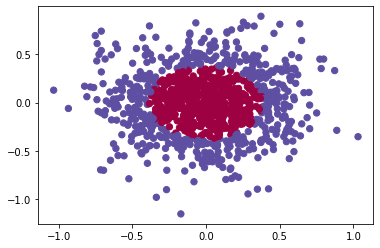

In [10]:
plt.scatter(X[:,0],X[:,1],c=Y[:,0],s=40,cmap=plt.cm.Spectral)

In [12]:
# Agregaremos las funciones de activación
def sigmoid(x,derivate=False):
  if derivate:
    return np.exp(-x)/((np.exp(-x)+1)**2)
  else:
    return 1/(1+np.exp(-x))

def relu(x,derivate=True):
  if derivate:
    x[x<=0]=0
    x[x>0]=1
    return x
  else:
    return np.maximum(0,x)

In [13]:
# Agregamos la funcion de perdida

def mse(y,y_hat,derivate=False):
  if derivate:
    return(y_hat - y)
  else:
    return np.mean((y_hat-y)**2)


### Crearemos la estructura de la red

In [28]:
def inicializar_parameters_deep(layers_dim):
  parameters={}
  L=len(layers_dim)
  for l in range(0,L-1):
    parameters["W"+str(l+1)]=(np.random.rand(layers_dim[l],layers_dim[l+1])*2)-1
    parameters["b"+str(l+1)]=(np.random.rand(l,layers_dim[l+1])*2)-1
  return parameters

    

In [29]:
layer_dims=[2,4,8,1]
params=inicializar_parameters_deep(layer_dims)

In [30]:
params


{'W1': array([[ 0.10944062,  0.38378601, -0.47776636, -0.08924827],
        [ 0.44304891,  0.11216416,  0.26339517,  0.23280294]]),
 'b1': array([], shape=(0, 4), dtype=float64),
 'W2': array([[-5.19445851e-01,  9.29124813e-02,  5.30661980e-01,
         -7.30986807e-01, -9.03868270e-01,  7.56185222e-01,
         -6.87933040e-01,  1.45641947e-01],
        [-6.61040029e-01, -4.37557586e-01,  5.49706064e-01,
         -6.36811101e-01,  2.41522187e-01, -5.83159437e-01,
          3.13642214e-02, -1.46409898e-01],
        [-6.41668583e-01,  1.03602125e-01, -4.20025223e-01,
          2.02465363e-01, -8.20362556e-01, -6.73541435e-01,
         -2.15744784e-01, -6.63093090e-01],
        [ 5.05253053e-01, -6.01452778e-01,  9.36900440e-01,
         -2.63420759e-04,  6.36560259e-01,  1.58310715e-01,
         -6.58707048e-01, -6.72783701e-01]]),
 'b2': array([[ 0.5583851 , -0.36328777,  0.55063939,  0.35839263, -0.04651706,
         -0.93337222, -0.01831646,  0.64239963]]),
 'W3': array([[-0.09431136